# D-optimal experiment design: comparing ABPG and Frank-Wolfe
Solve the D-Optimal experiment design problem
$$
\begin{array}{ll}
\textrm{minimize}   & F(x):=\log\left(\det\left(\sum_{i=1}^n x_i V_i V_i^T\right)\right) \\
\textrm{subject to} & \sum_{i=1}^n x_i = 1, \\ 
                    & x_i\geq 0, \quad i=1,\ldots,n
\end{array}
$$
where $V_i\in R^m$ for $i=1,\ldots,n$.

Methods compared:
* Original Frank-Wolfe method
* Frank-Wolfe method with away steps
* Bregman Proximal Gradient (BPG) method with adaptive line search
* Accelerated Bregman Proximal Gradient (ABPG) method with gain adaption

In [1]:
cd  C:\\github\accbpg

C:\github\accbpg


In [2]:
import numpy as np
import accbpg

def compare_FW_ABPG(m, n, Nmax, Nskip):

    f, h, L, x0Kh = accbpg.D_opt_design(m, n)
    x0KY = accbpg.D_opt_KYinit(f.H)
    x0Mx = (1-1e-3)*x0KY + 1e-3*x0Kh

    _, F_FWKh, _, _, T_FWKh = accbpg.D_opt_FW(f.H, x0Kh, 1e-8, maxitrs=Nmax, verbskip=Nskip)
    _, F_FWKY, _, _, T_FWKY = accbpg.D_opt_FW(f.H, x0KY, 1e-8, maxitrs=Nmax, verbskip=Nskip)
    _, F_WAKh, _, _, T_WAKh = accbpg.D_opt_FW_away(f.H, x0Kh, 1e-8, maxitrs=Nmax, verbskip=Nskip)
    _, F_WAKY, _, _, T_WAKY = accbpg.D_opt_FW_away(f.H, x0KY, 1e-8, maxitrs=Nmax, verbskip=Nskip)
    _, F_LSKh, _, T_LSKh = accbpg.BPG(f, h, L, x0Kh, maxitrs=Nmax, linesearch=True, ls_ratio=1.5, verbskip=Nskip)
    _, F_LSKY, _, T_LSKY = accbpg.BPG(f, h, L, x0Mx, maxitrs=Nmax, linesearch=True, ls_ratio=1.5, verbskip=Nskip)
    _, F_ABKh, _, _, _, T_ABKh = accbpg.ABPG_gain(f, h, L, x0Kh, gamma=2, maxitrs=Nmax, ls_inc=1.5, ls_dec=1.5, restart=True, verbskip=Nskip)
    _, F_ABKY, _, _, _, T_ABKY = accbpg.ABPG_gain(f, h, L, x0Mx, gamma=2, maxitrs=Nmax, ls_inc=1.5, ls_dec=1.5, restart=True, verbskip=Nskip)
    
    f_vals = [F_FWKh, F_FWKY, F_WAKh, F_WAKY, F_LSKh, F_LSKY, F_ABKh, F_ABKY]
    t_vals = [T_FWKh, T_FWKY, T_WAKh, T_WAKY, T_LSKh, T_LSKY, T_ABKh, T_ABKY]
    
    return f_vals, t_vals

In [3]:
import matplotlib
import matplotlib.pyplot as plt

# Plot required number of iterations and time
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'serif'})
matplotlib.rcParams.update({'text.usetex': True})

labels = [r"FW", r"FW KY", r"FW-away", r"FW-away KY", r"BPG-LS", r"BPG-LS KY", r"ABPG-g", r"ABPG-g KY"]
linestyles=['g-', 'g--', 'k-', 'k--', 'b-.', 'b:', 'r-', 'r--']

In [4]:
F1, T1 = compare_FW_ABPG(100, 10000, 100000, 10000)


Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   3.374e-01   7.656e-01   4.220e-01     0.0
 10000  -2.101e+01   9.238e-03   5.254e-01     2.8
 20000  -2.124e+01   4.707e-03   5.255e-01     5.4
 30000  -2.131e+01   3.194e-03   5.262e-01     7.9
 40000  -2.135e+01   2.372e-03   5.265e-01    10.4
 50000  -2.137e+01   1.970e-03   5.264e-01    13.0
 60000  -2.139e+01   1.627e-03   5.265e-01    16.4
 70000  -2.140e+01   1.410e-03   5.267e-01    19.0
 80000  -2.141e+01   1.207e-03   5.265e-01    21.6
 90000  -2.142e+01   1.080e-03   5.265e-01    24.1

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   1.405e+01   2.338e+00   2.510e-01     0.0
 10000  -2.113e+01   7.513e-03   3.263e-01     2.6
 20000  -2.128e+01   4.066e-03   3.261e-01     5.1
 30000  -2.133e+01   2.858e-03   3.259e-01     7.5
 40000  -2.137e+01   2.191e-03   3.259e-01    10.0
 50000  -2.138e+01   1.

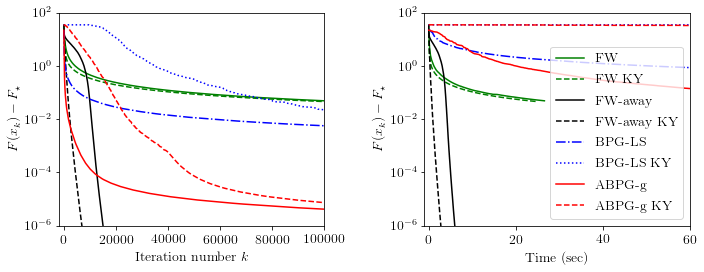

In [87]:
plt.subplots(1, 2, figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
accbpg.plot_comparisons(ax1, F1, labels, x_vals=[], plotdiff=True, yscale="log", xscale="linear", xlim=[-2000, 100000], ylim=[1e-6, 100], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="no", linestyles=linestyles)
ax2 = plt.subplot(1, 2, 2)
T1 = [ts - ts.min() + 1e-3 for ts in T1]
accbpg.plot_comparisons(ax2, F1, labels, x_vals=T1, plotdiff=True, yscale="log", xscale="linear", xlim=[-1, 60], ylim=[1e-6, 100], 
                        xlabel=r"Time (sec)", ylabel=r"$F(x_k)-F_\star$", legendloc=0, linestyles=linestyles)    
plt.tight_layout(h_pad=0.5, w_pad=2)
#plt.savefig("C:\github\\accbpg\\figures\\Dopt_compareFW_m100n10000.pdf", bbox_inches="tight")

In [6]:
F2, T2 = compare_FW_ABPG(100, 1000, 100000, 10000)


Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   5.153e+00   4.942e-01   3.514e-01     0.0
 10000  -2.082e+00   7.613e-03   3.480e-01     1.3
 20000  -2.236e+00   4.118e-03   3.466e-01     2.9
 30000  -2.295e+00   2.880e-03   3.457e-01     4.2
 40000  -2.326e+00   2.158e-03   3.457e-01     5.5
 50000  -2.346e+00   1.810e-03   3.452e-01     6.8
 60000  -2.360e+00   1.528e-03   3.452e-01     8.1
 70000  -2.370e+00   1.295e-03   3.451e-01     9.3
 80000  -2.377e+00   1.143e-03   3.451e-01    10.6
 90000  -2.383e+00   1.004e-03   3.451e-01    11.9

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   1.790e+01   1.755e+00   2.420e-01     0.0
 10000  -2.289e+00   4.307e-03   2.259e-01     1.3
 20000  -2.342e+00   2.458e-03   2.169e-01     2.6
 30000  -2.365e+00   1.768e-03   2.118e-01     3.9
 40000  -2.377e+00   1.398e-03   2.091e-01     5.2
 50000  -2.385e+00   1.

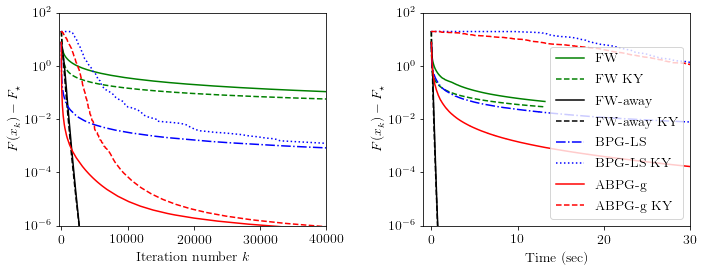

In [102]:
plt.subplots(1, 2, figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
accbpg.plot_comparisons(ax1, F2, labels, x_vals=[], plotdiff=True, yscale="log", xscale="linear", xlim=[-400, 40000], ylim=[1e-6, 100], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="no", linestyles=linestyles)
ax2 = plt.subplot(1, 2, 2)
accbpg.plot_comparisons(ax2, F2, labels, x_vals=T2, plotdiff=True, yscale="log", xscale="linear", xlim=[-1, 30], ylim=[1e-6, 100], 
                        xlabel=r"Time (sec)", ylabel=r"$F(x_k)-F_\star$", legendloc="lower right", linestyles=linestyles)    
plt.tight_layout(h_pad=0.5, w_pad=2)
#plt.savefig("C:\github\\accbpg\\figures\\Dopt_compareFW_m100n1000.pdf", bbox_inches="tight")

In [8]:
F3, T3 = compare_FW_ABPG(300, 1000, 100000, 10000)


Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   5.001e+01   2.482e-01   2.168e-01     0.0
 10000   4.760e+01   4.024e-03   1.410e-01     6.8
 20000   4.756e+01   2.243e-03   1.273e-01    14.2
 30000   4.754e+01   1.566e-03   1.193e-01    22.1
 40000   4.753e+01   1.193e-03   1.135e-01    29.8
 50000   4.753e+01   9.566e-04   1.093e-01    37.3
 60000   4.752e+01   8.202e-04   1.057e-01    45.0
 70000   4.752e+01   6.972e-04   1.027e-01    52.8
 80000   4.752e+01   6.474e-04   1.001e-01    60.5
 90000   4.752e+01   5.657e-04   9.775e-02    67.3

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   8.431e+01   1.480e+00   1.572e-01     0.0
 10000   4.758e+01   3.621e-03   1.256e-01     6.2
 20000   4.754e+01   1.950e-03   1.098e-01    13.2
 30000   4.753e+01   1.374e-03   1.005e-01    19.9
 40000   4.752e+01   1.081e-03   9.400e-02    27.1
 50000   4.752e+01   8.

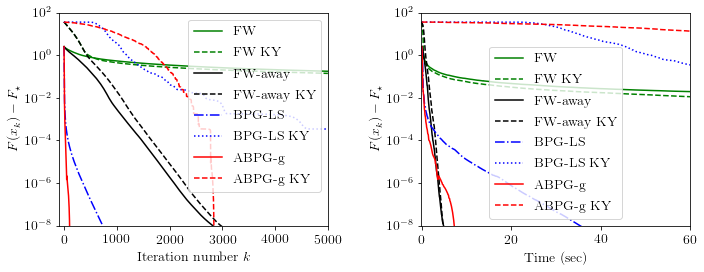

In [29]:
plt.subplots(1, 2, figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
accbpg.plot_comparisons(ax1, F3, labels, x_vals=[], plotdiff=True, yscale="log", xscale="linear", xlim=[-100, 5000], ylim=[1e-8,100], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc=0, linestyles=linestyles)
ax2 = plt.subplot(1, 2, 2)
accbpg.plot_comparisons(ax2, F3, labels, x_vals=T3, plotdiff=True, yscale="log", xscale="linear", xlim=[-0.2, 60], ylim=[1e-8, 100], 
                        xlabel=r"Time (sec)", ylabel=r"$F(x_k)-F_\star$", legendloc=0, linestyles=linestyles)    
plt.tight_layout(h_pad=0.5, w_pad=2)
#plt.savefig("C:\github\\accbpg\\figures\\Dopt_compareFW_m300n1000.pdf", bbox_inches="tight")

In [10]:
#F4, T4 = compare_FW_ABPG(800, 2500, 100000, 10000)
F4, T4 = compare_FW_ABPG(400, 1000, 100000, 10000)


Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   9.220e+01   1.766e-01   1.743e-01     0.0
 10000   9.076e+01   3.161e-03   1.056e-01    44.5
 20000   9.073e+01   1.652e-03   9.154e-02    88.1
 30000   9.072e+01   1.096e-03   8.339e-02   131.8
 40000   9.072e+01   8.128e-04   7.787e-02   175.2
 50000   9.071e+01   6.137e-04   7.388e-02   218.1
 60000   9.071e+01   4.868e-04   7.076e-02   261.1
 70000   9.071e+01   4.163e-04   6.821e-02   305.0
 80000   9.071e+01   3.683e-04   6.603e-02   347.9
 90000   9.071e+01   3.278e-04   6.408e-02   391.2

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   1.192e+02   1.569e+00   1.618e-01     0.0
 10000   9.074e+01   2.698e-03   1.102e-01    44.1
 20000   9.072e+01   1.422e-03   9.750e-02    87.6
 30000   9.072e+01   9.733e-04   8.990e-02   131.5
 40000   9.071e+01   7.505e-04   8.443e-02   175.1
 50000   9.071e+01   6.

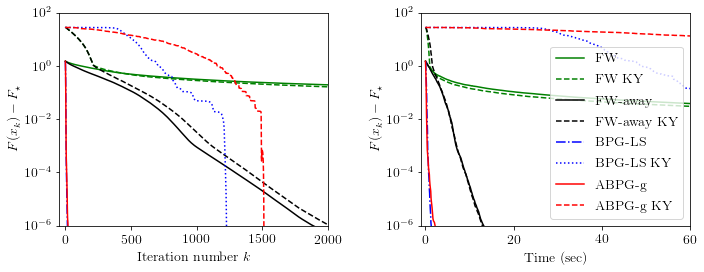

In [90]:
plt.subplots(1, 2, figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
accbpg.plot_comparisons(ax1, F4, labels, x_vals=[], plotdiff=True, yscale="log", xscale="linear", xlim=[-50, 2000], ylim=[1e-6, 100], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="no", linestyles=linestyles)
ax2 = plt.subplot(1, 2, 2)
accbpg.plot_comparisons(ax2, F4, labels, x_vals=T4, plotdiff=True, yscale="log", xscale="linear", xlim=[-1, 60], ylim=[1e-6, 100], 
                        xlabel=r"Time (sec)", ylabel=r"$F(x_k)-F_\star$", legendloc="lower right", linestyles=linestyles)    
plt.tight_layout(h_pad=0.5, w_pad=2)
#plt.savefig("C:\github\\accbpg\\figures\\Dopt_compareFW_m400n1000.pdf", bbox_inches="tight")

In [12]:
F5, T5 = compare_FW_ABPG(500, 1000, 100000, 10000)


Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   1.533e+02   1.668e-01   1.348e-01     0.1
 10000   1.523e+02   2.277e-03   7.433e-02    62.5
 20000   1.522e+02   1.118e-03   6.293e-02   126.9
 30000   1.522e+02   7.191e-04   5.643e-02   192.8
 40000   1.522e+02   5.361e-04   5.189e-02   258.1
 50000   1.522e+02   4.205e-04   4.850e-02   321.2
 60000   1.522e+02   3.432e-04   4.579e-02   383.4
 70000   1.522e+02   2.856e-04   4.352e-02   445.7
 80000   1.522e+02   2.452e-04   4.163e-02   509.9
 90000   1.522e+02   2.043e-04   4.003e-02   575.2

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   1.533e+02   1.668e-01   1.348e-01     0.0
 10000   1.523e+02   2.277e-03   7.433e-02    56.8
 20000   1.522e+02   1.118e-03   6.293e-02   107.6
 30000   1.522e+02   7.191e-04   5.643e-02   158.2
 40000   1.522e+02   5.361e-04   5.189e-02   208.8
 50000   1.522e+02   4.

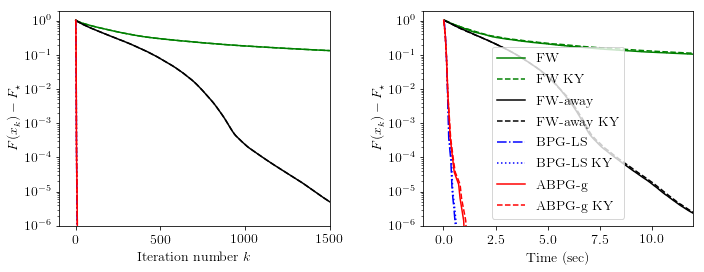

In [97]:
plt.subplots(1, 2, figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
accbpg.plot_comparisons(ax1, F5, labels, x_vals=[], plotdiff=True, yscale="log", xscale="linear", xlim=[-100, 1500], ylim=[1e-6, 2], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="no", linestyles=linestyles)
ax2 = plt.subplot(1, 2, 2)
accbpg.plot_comparisons(ax2, F5, labels, x_vals=T5, plotdiff=True, yscale="log", xscale="linear", xlim=[-1, 12], ylim=[1e-6, 2], 
                        xlabel=r"Time (sec)", ylabel=r"$F(x_k)-F_\star$", legendloc="lower center", linestyles=linestyles)    
plt.tight_layout(h_pad=0.5, w_pad=2)
#plt.savefig("C:\github\\accbpg\\figures\\Dopt_compareFW_m500n1000.pdf", bbox_inches="tight")

In [14]:
F6, T6 = compare_FW_ABPG(350, 1000, 100000, 10000)


Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   7.005e+01   2.179e-01   1.774e-01     0.0
 10000   6.823e+01   3.132e-03   1.116e-01     6.5
 20000   6.821e+01   1.616e-03   9.886e-02    12.7
 30000   6.820e+01   1.081e-03   9.152e-02    19.0
 40000   6.819e+01   8.083e-04   8.662e-02    25.2
 50000   6.819e+01   6.758e-04   8.275e-02    31.5
 60000   6.819e+01   5.750e-04   7.951e-02    37.8
 70000   6.819e+01   5.059e-04   7.669e-02    44.1
 80000   6.819e+01   4.622e-04   7.425e-02    50.3
 90000   6.818e+01   4.081e-04   7.202e-02    56.7

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   1.049e+02   1.710e+00   1.457e-01     0.0
 10000   6.823e+01   3.285e-03   1.253e-01     6.9
 20000   6.821e+01   1.662e-03   1.117e-01    13.2
 30000   6.820e+01   1.095e-03   1.038e-01    19.7
 40000   6.819e+01   8.259e-04   9.847e-02    25.9
 50000   6.819e+01   6.

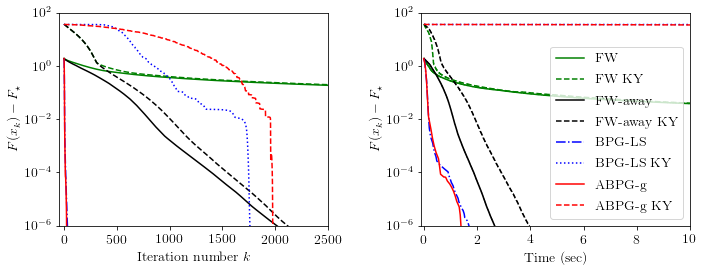

In [92]:
plt.subplots(1, 2, figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
accbpg.plot_comparisons(ax1, F6, labels, x_vals=[], plotdiff=True, yscale="log", xscale="linear", xlim=[-50, 2500], ylim=[1e-6, 100], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="no", linestyles=linestyles)
ax2 = plt.subplot(1, 2, 2)
accbpg.plot_comparisons(ax2, F6, labels, x_vals=T6, plotdiff=True, yscale="log", xscale="linear", xlim=[-0.1, 10], ylim=[1e-6, 100], 
                        xlabel=r"Time (sec)", ylabel=r"$F(x_k)-F_\star$", legendloc="lower right", linestyles=linestyles)    
plt.tight_layout(h_pad=0.5, w_pad=2)
#plt.savefig("C:\github\\accbpg\\figures\\Dopt_compareFW_m350n1000.pdf", bbox_inches="tight")